## An adaptive algorithm of pseudo Wigner-Ville Distribution

#### This sample aims to reproduce Figure 5.3 of the book "Time-frequency signal analysis with applications" by Stankovic, Dakovic, and Thayaparan. 


In [2]:
using Winston;using Color;
include("sampledata.jl")

sampledata

#### data with Gaussian noise

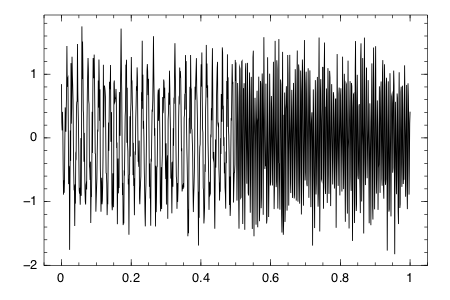

In [3]:
nsample=1024
x,z,iw,ynorm=sampledata.genstepfm(nsample);
using Distributions
d = Normal()
ynoise=real(z)+rand(d,nsample)/3.16
#iynoise=imag(z)+rand(d,nsample)/3.16
#z=ynoise-iynoise
nsample=length(x);dx=x[2]-x[1];freqfac=1/nsample/dx/2;ynorm=pi/x[end];
plot(x,ynoise)

#### Instantaneous (angular) Frequency 

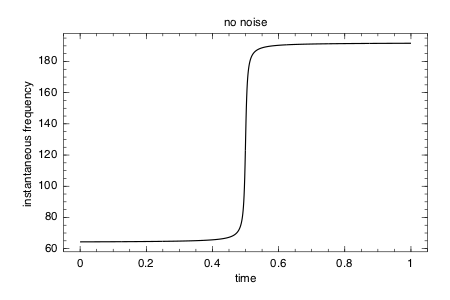

In [4]:
p = FramedPlot(title="no noise",xlabel="time",ylabel="instantaneous frequency",);
add(p, Curve(x,iw/(2*pi),width=3))

In [5]:
include("jnufft.jl");
include("cohenclass.jl");
include("estif.jl");
include("juwutils.jl");

In [6]:
import DSP
z=DSP.Util.hilbert(ynoise);

### Wigner Ville Distribution 

Single Wigner Ville
Use fft.


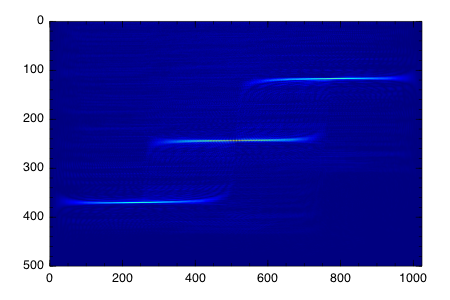

In [7]:
tfr=cohenclass.tfrwv(z);indfwv=extif.maxif(abs(tfr));imagesc(abs(tfr[500:-1:1,:]))

### pseudo Wigner Ville with N/4 window and N/16
### you can see a smoothing effect for a narrow width

Single pseudo Wigner Ville
Use fft.


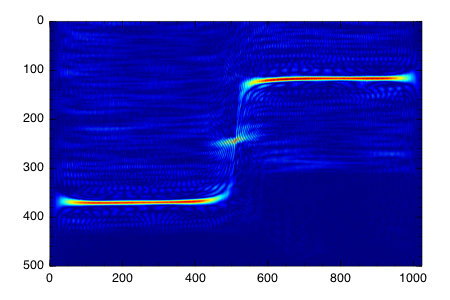

In [8]:
tfrp=cohenclass.tfrpwv(z);indfpwv256=extif.maxif(abs(tfrp));imagesc(abs(tfrp[500:-1:1,:]))

Single pseudo Wigner Ville


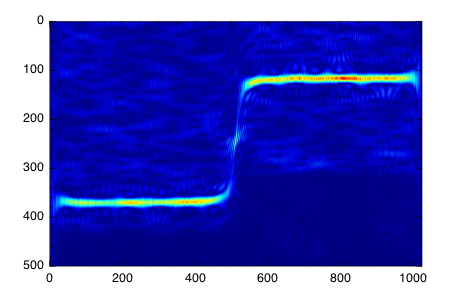

Use fft.


In [9]:
tfrp=cohenclass.tfrpwv(z,NaN,NaN,NaN,NaN,NaN,0,"mean",8);indfpwv128=extif.maxif(abs(tfrp));imagesc(abs(tfrp[500:-1:1,:])./mean(abs(tfrp[500:-1:1,:]),1))

Single pseudo Wigner Ville


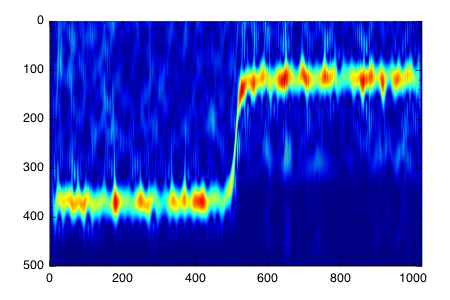

Use fft.


In [10]:
tfrp=cohenclass.tfrpwv(z,NaN,NaN,NaN,NaN,NaN,0,"mean",32);indfpwv32=extif.maxif(abs(tfrp));imagesc(abs(tfrp[500:-1:1,:]))

### adaptive window

In [14]:
include("pwvaw.jl");

In [12]:
fin=collect(linspace(1,512,1024));
varrat=ones(length(x))./(3.16*3.16);

In [15]:
### kappa=2.0, delta kappa=0.39, 
### ndiv_static_crit=4 i.e. accept the criterion if delta frequency < nsample/4
### use Hamming window

tfra,windows=pwvaw.awpwv(z,varrat,NaN,NaN,fin,NaN,2.0,0.39,4,"Hamming");

Single pseudo Wigner Ville with the Adaptive Algorithm


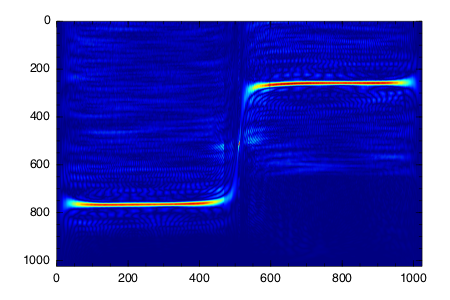

In [16]:
imagesc(abs(tfra[end:-1:1,:]))

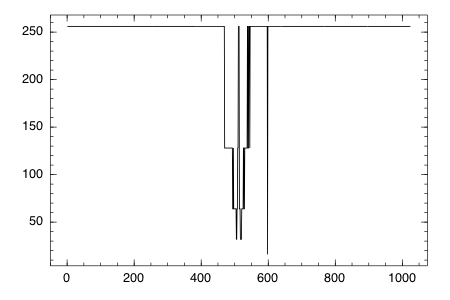

In [17]:
plot(collect(1:length(windows)),map(Float64,windows))

In [18]:
include("juwutils.jl");
indfn=extif.maxif(abs(tfra));
fx=juwutils.index_to_frequency(indfn, fin, dx,nsample);

#### comparison between WV, PWV (fixed window=256 and 32), and  PWV (adaptive)

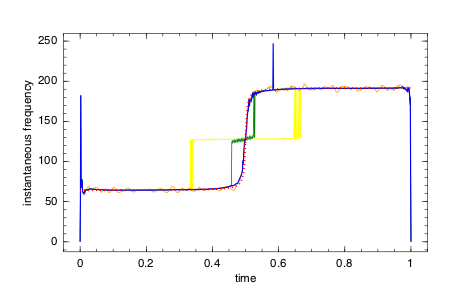

In [20]:
fwv=juwutils.index_to_frequency(indfwv,NaN, dx,nsample);
fwv32=juwutils.index_to_frequency(indfpwv32,NaN, dx,nsample);
fwv256=juwutils.index_to_frequency(indfpwv256,NaN, dx,nsample);
p = FramedPlot(title="",xlabel="time",ylabel="instantaneous frequency",);

add(p, Curve(x,fwv,color="yellow"))
add(p, Curve(x,fwv32,color="orange"))
add(p, Curve(x,fwv256,color="green"))
add(p, Curve(x,fx,color="blue",width=3))
add(p,Curve(x,abs(iw/(2*pi)),color="red",width=5, kind="dotted"))